In [192]:
import requests
import nltk
import regex as re
import numpy as np
import spacy

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from snowballstemmer import TurkishStemmer
from bs4 import BeautifulSoup

from collections import Counter
from xmltodict import parse

# Lecture 9

## Natural Language Processing in Python

### What is Natural Language Processing?

Text data has a structure and that structure comes from the language the text written in. The text you are reading now is in English. For the rest of the day, most of us use Turkish.

In order to process a text, we must then process it using this structure. For this we need [natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing) tools.

According to Wikipedia, NLP is

> Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. 

In other words, in order to get computer readable data ready to be processed by machine learning algorithms, we need NLP.

### Python's NLP Ecosystem

Python has a variety of options when it comes to NLP. The main general purpose NLP libraries are

1. [NLTK](https://www.nltk.org/)
2. [GenSim](https://radimrehurek.com/gensim/index.html)
2. [Spacy](https://spacy.io/)
3. [TextBlob](https://textblob.readthedocs.io/en/dev/)

There are also specialized libraries:

1. [Chazutsu](https://github.com/chakki-works/chazutsu): To get standNLP datasets for experiments.
2. [BigARTM](https://github.com/bigartm/bigartm): A fast topic modelling library for python.
3. [Hugging Face Tokenizers](https://github.com/huggingface/tokenizers): A fast text tokenizer.

The NLP ecosystem (python or otherwise) is quite large. If you are interested, you should checkout [awesome-nlp](https://github.com/keon/awesome-nlp).

### Turkish NLP Ecosystem

[Deniz Yüret](http://www.denizyuret.com/) from Koç University keeps [a list of Turkish NLP resources](http://www.denizyuret.com/2006/11/turkish-resources.html) at his website.


## What can we do?

Last week I showed how to summarize a text using basic linear algebra. Today, let us some other fancy stuff :)

Let us start with the proper way of *tokenizing* a text:

### Tokenization

Tokenization is splitting a text into meaningful units. These units can be words, sentences, or paragraphs. For today's purposes spliting into words and sentences should be enough:

Last time, we tokenized a novella *[The Old Man and the Sea](https://www.gutenberg.org/ebooks/10571)* by W.W. Jacobs. This time, I'll work with another famous novel with the same name: *[Old Man and the Sea](https://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt)* by Earnst Hemingway.

In [208]:
with requests.get('https://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt') as url:
    raw = url.text

In [209]:
raw

'\n* A Project Gutenberg Canada Ebook *\n\nThis ebook is made available at no cost and with very few\nrestrictions. These restrictions apply only if (1) you make\na change in the ebook (other than alteration for different\ndisplay devices), or (2) you are making commercial use of\nthe ebook. If either of these conditions applies, please\ncheck gutenberg.ca/links/licence.html before proceeding.\n\nThis work is in the Canadian public domain, but may be\nunder copyright in some countries. If you live outside Canada,\ncheck your country\'s copyright laws. IF THE BOOK IS UNDER\nCOPYRIGHT IN YOUR COUNTRY, DO NOT DOWNLOAD\nOR REDISTRIBUTE THIS FILE.\n\nTitle: The Old Man and the Sea\nAuthor: Hemingway, Ernest (1899-1961)\nDate of first publication: 1952\nEdition used as base for this ebook:\n   New York: Charles Scribner\'s Sons, 1952\nDate first posted: 21 May 2012\nDate last updated: 21 May 2012\nProject Gutenberg Canada ebook #948\n\nThis ebook was produced by Al Haines\n\n\n\n\n\n\nTHE OL

There is a preamble to the text and a postscript. Let us remove those:

In [3]:
OMATS = raw[1310:135830]

In [214]:
len(word_tokenize(OMATS))

30381

In [4]:
omats = {'sentences': sent_tokenize(OMATS),
         'words': word_tokenize(OMATS)}
(len(omats['sentences']),len(omats['words']))

(1923, 30381)

But, let us notice that there are punctuation marks and words are capitalized at the beginning of sentences.

In [224]:
N = len(omats['sentences'])
m = np.random.randint(N)
omats['sentences'][m]

'"It is half a\nday and a night and now another day and you have not slept.'

Let us clean those and remove all of the stop-words:

In [225]:
swEN = set(stopwords.words('english'))
swEN

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [226]:
omats.update({'cleanedSentences': [re.sub(r'[^\p{Letter}\s]','',sentence.lower()) for sentence in omats['sentences']],
              'cleanedWords': [re.sub(r'[^\p{Letter}]','',word.lower()) for word in omats['words']]})

In [230]:
omats['cleanedWords']

['the',
 'old',
 'man',
 'and',
 'the',
 'sea',
 'he',
 'was',
 'an',
 'old',
 'man',
 'who',
 'fished',
 'alone',
 'in',
 'a',
 'skiff',
 'in',
 'the',
 'gulf',
 'stream',
 'and',
 'he',
 'had',
 'gone',
 'eightyfour',
 'days',
 'now',
 'without',
 'taking',
 'a',
 'fish',
 '',
 'in',
 'the',
 'first',
 'forty',
 'days',
 'a',
 'boy',
 'had',
 'been',
 'with',
 'him',
 '',
 'but',
 'after',
 'forty',
 'days',
 'without',
 'a',
 'fish',
 'the',
 'boy',
 's',
 'parents',
 'had',
 'told',
 'him',
 'that',
 'the',
 'old',
 'man',
 'was',
 'now',
 'definitely',
 'and',
 'finally',
 'salao',
 '',
 'which',
 'is',
 'the',
 'worst',
 'form',
 'of',
 'unlucky',
 '',
 'and',
 'the',
 'boy',
 'had',
 'gone',
 'at',
 'their',
 'orders',
 'in',
 'another',
 'boat',
 'which',
 'caught',
 'three',
 'good',
 'fish',
 'the',
 'first',
 'week',
 '',
 'it',
 'made',
 'the',
 'boy',
 'sad',
 'to',
 'see',
 'the',
 'old',
 'man',
 'come',
 'in',
 'each',
 'day',
 'with',
 'his',
 'skiff',
 'empty',
 'and'

Let us do one example in Turkish too. For this I am going to use [Nutuk](https://en.wikipedia.org/wiki/Nutuk) by Atatürk:

In [231]:
with requests.get('https://archive.org/stream/mustafa-kemal-ataturk-nutuk-orijinal-metin/Mustafa%20Kemal%20Atat%C3%BCrk%20-%20Nutuk%20%28Orijinal%20Metin%29_djvu.txt') as url:
    raw = url.content

In [234]:
html = BeautifulSoup(raw)
tmp = html.find_all('pre')[0].text

There is a table of contents at the beginning and an index at the end. Let us remove those too.

In [10]:
NUTUK = tmp[38256:1640570]
nutuk = {'sentences': sent_tokenize(NUTUK,language='turkish'),
         'words': word_tokenize(NUTUK,language='turkish')}
 
(len(nutuk['sentences']),len(nutuk['words']))

(13214, 245924)

In [36]:
swTR = set(stopwords.words('turkish'))

nutuk.update({'cleanedSentences': [re.sub(r'[^\p{L}\s]','',sentence.lower()) for sentence in nutuk['sentences']],
              'cleanedWords': [re.sub(r'[^\p{L}]','',word.lower()) for word in nutuk['words']]})

### Stemming

A word might have different forms derived by adding certain suffixes:

> token -> tokens, tokenize, tokenized, tokenization

It might be useful to get the root of a word from its current form. This operation is called "stemming"

In [17]:
stemmer = SnowballStemmer('english')
stemmer.stem('tokenization')

'token'

In [238]:
stemmer.stem('drowsy')

'drowsi'

We can do this in other languages, but it requires different tools:

In [239]:
trStemmer = TurkishStemmer()
trStemmer.stemWord('tercihlerinde')

'tercih'

In [242]:
trStemmer.stemWord('bayraklarından')

'bayrak'

Let us clean and stem all of the words we collected from Hemingway's novel, and also remove stop-words.

In [243]:
swEN = stopwords.words('english')

stemmed = [stemmer.stem(word) for word in omats['cleanedWords']]
reduced = [word for word in stemmed if word not in swEN]

(len(stemmed),len(reduced),len(set(reduced)))

(30381, 15518, 1813)

Let us repeat what we did above for Nutuk:

In [244]:
swTR = stopwords.words('turkish')

stemmed = [trStemmer.stemWord(word) for word in nutuk['cleanedWords']]
reduced = [word for word in stemmed if word not in swTR]

(len(stemmed),len(reduced),len(set(reduced)))

(245924, 225453, 13982)

In [50]:
set(reduced)

{'',
 'bayra',
 'mudu',
 'son',
 'vilayat',
 'döfra',
 'devretme',
 'nefret',
 'başlandık',
 'parça',
 'teşebbis',
 'cinai',
 'teşvikkâr',
 'mües',
 'makines',
 'intikal',
 'cut',
 'müsteşarlık',
 'ahvalde',
 'hakk',
 'tahrik',
 'yapamaz',
 'yalvaç',
 'hıyane',
 'yatıl',
 'zetlenme',
 'fen',
 'ristiya',
 'yapıla',
 'atmış',
 'girmez',
 'konuştuk',
 'bozdak',
 'şekille',
 'müşerref',
 'övülme',
 'henderso',
 'telgrafhanes',
 'vapabilmek',
 'uğraşıl',
 'gösterilecek',
 'uşaklık',
 'çarptır',
 'mutabakat',
 'aldırmaksız',
 'şur',
 'erciyes',
 'mahdı',
 'abaz',
 'istifaneme',
 'cevdet',
 'kablelir',
 'lahiye',
 'nap',
 'ör',
 'baybur',
 'katıldık',
 'alınarak',
 'yorgunluk',
 'şebbü',
 'kesilecek',
 'kıpırdamama',
 'yaza',
 'tur',
 'sırt',
 'maksut',
 'saplaya',
 'geleme',
 'ahali',
 'getirtme',
 'okuyal',
 'emek',
 'arapça',
 'çekemeyen',
 'çevirme',
 'bahsederek',
 'sevinçle',
 'tamamlandık',
 'sızladı',
 'per',
 'öldürme',
 'taarruz',
 'bulunduracak',
 'à',
 'kundur',
 'sok',
 'hu',
 'k

### Part of Speech Tagging

Part of speech tagging splits a sentence and labels each word according to its function within a sentence.

In [61]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [264]:
N = len(omats['sentences'])
n = np.random.randint(N)
example = omats['sentences'][n]
(example,nltk.pos_tag(word_tokenize(example,language='english')))

('"If sharks come, God pity him and\nme."',
 [('``', '``'),
  ('If', 'IN'),
  ('sharks', 'NNS'),
  ('come', 'VBP'),
  (',', ','),
  ('God', 'NNP'),
  ('pity', 'NN'),
  ('him', 'PRP'),
  ('and', 'CC'),
  ('me', 'PRP'),
  ('.', '.'),
  ("''", "''")])

Unfortunately, this doesn't work well with Turkish.

In [265]:
nltk.pos_tag(word_tokenize(nutuk['sentences'][999]),lang='turkish')

NotImplementedError: Currently, NLTK pos_tag only supports English and Russian (i.e. lang='eng' or lang='rus')

## How can we use POS Taggers? 

### An application: Named Entity Extraction

We are going to use POS tagger to extract *named entitites* from a text:

In [266]:
def getSubjectGuardian(subject):
    with requests.get(f'https://www.theguardian.com/{subject}/rss') as link:
        raw = parse(link.text)
    return raw['rss']['channel']['item']

def getText(url):
    with requests.get(url) as link:
        raw = BeautifulSoup(link.content,'html.parser')
    return ' '.join([x.text for x in raw.find_all('p')])


In [268]:
economy = getSubjectGuardian('economy')
text = getText(economy[0]['link'])
text

'Inflation will limit UK consumers’ spending power, with energy costs a particular problem Britain’s economy is at growing risk of falling into a summer recession amid the biggest squeeze on household incomes since the mid 1950s, as soaring inflation curtails consumer spending power, forecasters have said. Economists said the double blow from slowing post-lockdown growth and rising living costs after Russia’s invasion of Ukraine could result in a fall in gross domestic product (GDP) for two consecutive quarters, which is the definition of a recession. After a weaker-than-expected growth performance in February, and with the inflation rate reaching the highest levels since 1992 last month, City forecasters said UK GDP was now on track to grow by about 1% in the first quarter of 2022 before slipping into reverse this summer. Analysts said activity would be reduced by an extra bank holiday for the Queen’s platinum jubilee in July, as public holidays usually lead to a drop in overall econo

Figures from the Office for National Statistics due on Friday this week are expected to show a fall in retail sales in March as households tighten their belts.


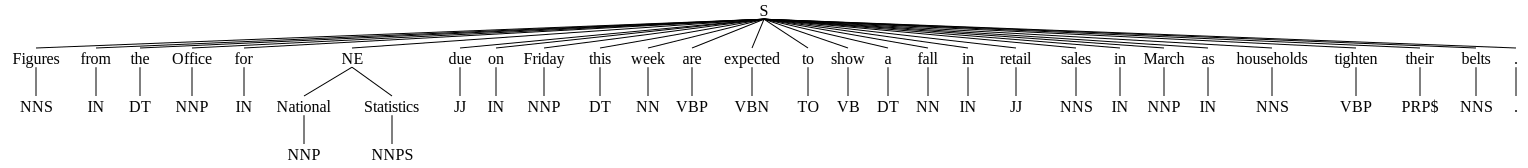

In [273]:
sentences = sent_tokenize(text)
N = len(sentences)
n = np.random.randint(N)
print(sentences[n])

words = word_tokenize(sentences[n])
tags = nltk.pos_tag(words)
tree = nltk.ne_chunk(tags, binary=True)
tree

In [274]:
def extract_ne(text,lang='english'):
    words = word_tokenize(text, language=lang)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )

In [275]:
extract_ne(text)

{'Britain',
 'Capital Economics',
 'City',
 'Covid',
 'Dutch',
 'GDP',
 'Inflation',
 'International Monetary Fund',
 'James Smith',
 'Kristalina Georgieva',
 'National Statistics',
 'Neil Shearing',
 'Queen',
 'RSM UK',
 'Russia',
 'Smith',
 'Thomas Pugh',
 'UK GDP',
 'Ukraine'}

In [276]:
culture = getSubjectGuardian('culture')
text  = getText(culture[2]['link'])
extract_ne(text)

{'Anne',
 'Anne Darwin',
 'Baldrick',
 'Chris Lang',
 'Christopher',
 'Darwins',
 'David Thewlis',
 'Dolan',
 'Eddie Marsan',
 'Edinburgh Award',
 'France',
 'ITV',
 'John',
 'John Darwin',
 'Lang',
 'Mansfield',
 'Marsan',
 'Monica Dolan',
 'Olivia Colman',
 'Range',
 'Sarah Millican',
 'Seaton Carew',
 'Susan Edwards',
 'Tammy Wynette',
 'Ukraine',
 'Unforgotten'}

Let us see if this is going to work for Turkish:

In [277]:
def getSubjectMilliyet(subject):
    with requests.get(f'https://www.milliyet.com.tr/rss/rssNew/{subject}Rss.xml') as link:
        raw = parse(link.text)
    return raw['rss']['channel']['item']

In [280]:
ekonomi = getSubjectMilliyet('ekonomi')
text = getText(ekonomi[1]['atom:link']['@href'])
text

"Sanayi ve Teknoloji Bakanı Mustafa Varank, Yozgat programı dahilinde Organize Sanayi Bölgesinde elektronik alanında üretim yapacak bir fabrikanın açılış törenine katıldı. Burada konuşan Varank, Bakanlığı tarafından Yozgat’a yapılan yatırımlara değindi. YOZGAT’TAKİ OSB’LERE 11 MİLYONLUK KAYNAK Varank konuşmasında Bozok OSB ve Fuat Oktay OSB’ye 2022 yatırım programında 11 milyon lira ödenek ayırdıklarını belirterek, “İlimizin OSB sayısı son 19 yıldaki yatırımlarımızla 4’e çıktı. Bugün üretime geçen 49 parsellerde 3 binin üzerinde istihdam sağlanıyor. İnşallah tüm parsellerde üretime geçilmesiyle bu sayı yaklaşık 9 bine ulaşacak. Sanayi ve Teknoloji Bakanlığı olarak üretim ve istihdamın dinamosu olan OSB’lerimize her türlü desteği sağlıyoruz. Örneğin Yozgat’ın heyecanla beklediği Bozok OSB ve Fuat Oktay OSB’ye 2022 yatırım programında 11 milyon lira ödenek ayırdık. Bozok OSB’de altyapı yatırımları tamamlandı. Başvurular alındı. Tahsisler yapılmaya başlandı. Yine Fuat Oktay OSB’de de araz

In [281]:
extract_ne(text,lang='turkish')

{'Akıllı Trafik Sistemleri',
 'Anadolu',
 'Bakanlığı',
 'Bozok',
 'Bugün',
 'Burada',
 'Dünya',
 'Elektromekanik Sistemleri',
 'Firma',
 'Fuat Oktay',
 'KAYNAK Varank',
 'KİŞİ',
 'MİLYONLUK',
 'MİLYONLUK YATIRIM',
 'OLMADAN',
 'OSB',
 'Organize Sanayi Bölgesinde',
 'Sanayi',
 'Sinyalizasyon Sistemleri',
 'TEKNOLOJİK',
 'Tahsisler',
 'Teknoloji Bakanlığı',
 'Teknoloji Bakanı Mustafa Varank',
 'Tıbbi Cihaz',
 'Varank',
 'YOZGAT',
 'Yine Fuat Oktay',
 'Yolcu Bilgilendirme Sistemleri',
 'Yozgat',
 'İSTİHDAM'}

### An Alternative Approach



In [282]:
NER = spacy.load("en_core_web_sm")

In [283]:
res = NER(getText(economy[1]['link']))
[(word.text, word.label_) for word in res.ents]

[('16 years', 'DATE'),
 ('Christmas', 'DATE'),
 ('Farepak', 'ORG'),
 ('thousands', 'CARDINAL'),
 ('this week', 'DATE'),
 ('hundreds of thousands', 'CARDINAL'),
 ('Britons', 'ORG'),
 ('Christmas', 'DATE'),
 ('two', 'CARDINAL'),
 ('16 years', 'DATE'),
 ('Christmas', 'DATE'),
 ('Farepak', 'ORG'),
 ('about 100,000', 'CARDINAL'),
 ('the year', 'DATE'),
 ('one', 'CARDINAL'),
 ('Christmas', 'DATE'),
 ('The Department for Business, Energy and Industrial Strategy', 'ORG'),
 ('this week', 'DATE'),
 ('Christmas', 'DATE'),
 ('Farepak', 'ORG'),
 ('2006', 'DATE'),
 ('about £37m', 'MONEY'),
 ('about 100,000', 'CARDINAL'),
 ('400', 'MONEY'),
 ('four', 'CARDINAL'),
 ('six years', 'DATE'),
 ('about 50p', 'CARDINAL'),
 ('Christmas', 'DATE'),
 ('UK', 'GPE'),
 ('Park Christmas Savings', 'ORG'),
 ('about 350,000', 'CARDINAL'),
 ('annually', 'DATE')]

In [284]:
res = NER(getText(culture[2]['link']))
[(word.text, spacy.explain(word.label_)) for word in res.ents]

[('Anne Darwin', 'People, including fictional'),
 ('3,000', 'Monetary values, including unit'),
 ('Tammy Wynette', 'People, including fictional'),
 ('Anne', 'People, including fictional'),
 ('Unforgotten', 'People, including fictional'),
 ('Chris Lang', 'People, including fictional'),
 ('Canoe', 'People, including fictional'),
 ('ITV', 'Companies, agencies, institutions, etc.'),
 ('2002', 'Absolute or relative dates or periods'),
 ('51-year-old', 'Absolute or relative dates or periods'),
 ('Seaton Carew', 'Countries, cities, states'),
 ('Co Durham', 'People, including fictional'),
 ('two', 'Numerals that do not fall under another type'),
 ('John', 'People, including fictional'),
 ('Eddie Marsan', 'People, including fictional'),
 ('Anne', 'People, including fictional'),
 ('Monica Dolan', 'People, including fictional'),
 ('a couple of weeks', 'Absolute or relative dates or periods'),
 ('Marsan', 'People, including fictional'),
 ('Walter Mitty', 'People, including fictional'),
 ('Dolan', 

## Another Application

### Sentiment analysis

Can we measure if a given sentence/word has positive connotation? Yes, we can! However, you should be aware of the fact that the sentiment analysis is not a structural measurement. Rather, some people labeled a collection of words as positive, negative and neutral and then trained a machine learning model. We are going to use that. As such the results are not absolute measurements of polarity, but a polarity measure designed by an arbitrary collection of researchers :) 

In [122]:
analyzer = SentimentIntensityAnalyzer()

In [285]:
text = getText(economy[0]['link'])
text

'Inflation will limit UK consumers’ spending power, with energy costs a particular problem Britain’s economy is at growing risk of falling into a summer recession amid the biggest squeeze on household incomes since the mid 1950s, as soaring inflation curtails consumer spending power, forecasters have said. Economists said the double blow from slowing post-lockdown growth and rising living costs after Russia’s invasion of Ukraine could result in a fall in gross domestic product (GDP) for two consecutive quarters, which is the definition of a recession. After a weaker-than-expected growth performance in February, and with the inflation rate reaching the highest levels since 1992 last month, City forecasters said UK GDP was now on track to grow by about 1% in the first quarter of 2022 before slipping into reverse this summer. Analysts said activity would be reduced by an extra bank holiday for the Queen’s platinum jubilee in July, as public holidays usually lead to a drop in overall econo

In [286]:
analyzer.polarity_scores(text)

{'neg': 0.072, 'neu': 0.851, 'pos': 0.077, 'compound': 0.6249}

In [287]:
sentences = sent_tokenize(text)
[(x,analyzer.polarity_scores(x)) for x in sentences]

[('Inflation will limit UK consumers’ spending power, with energy costs a particular problem Britain’s economy is at growing risk of falling into a summer recession amid the biggest squeeze on household incomes since the mid 1950s, as soaring inflation curtails consumer spending power, forecasters have said.',
  {'neg': 0.18, 'neu': 0.745, 'pos': 0.075, 'compound': -0.6597}),
 ('Economists said the double blow from slowing post-lockdown growth and rising living costs after Russia’s invasion of Ukraine could result in a fall in gross domestic product (GDP) for two consecutive quarters, which is the definition of a recession.',
  {'neg': 0.139, 'neu': 0.8, 'pos': 0.061, 'compound': -0.5106}),
 ('After a weaker-than-expected growth performance in February, and with the inflation rate reaching the highest levels since 1992 last month, City forecasters said UK GDP was now on track to grow by about 1% in the first quarter of 2022 before slipping into reverse this summer.',
  {'neg': 0.0, 'ne

In [288]:
sentences = sent_tokenize(getText(culture[0]['link']))
[(x,analyzer.polarity_scores(x)) for x in sentences]

[('She rose from poverty to become the first Black person to win acting’s triple crown.',
  {'neg': 0.164, 'neu': 0.647, 'pos': 0.189, 'compound': 0.128}),
 ('Now she is playing Michelle Obama and opening up about her tough path to the top Many of us had existential thoughts during lockdown, and assuaged them with new hobbies.',
  {'neg': 0.047, 'neu': 0.841, 'pos': 0.112, 'compound': 0.2732}),
 ('We did thousand-piece puzzles.',
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}),
 ('We crocheted and knitted.',
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}),
 ('We learned new songs on our guitars, baked overzealously, and connected with our plantlife.',
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}),
 ('For Viola Davis, knocking around in her $5m mansion in Toluca Lake, Los Angeles, it was writing, though the nature of it was less assuagement than staring into the coalface of an existential crisis.',
  {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.62